### EDA Analysis
#### Text for fine tuning LLM paraphrase-multilingual-MiniLM-L12-v2

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from pathlib import Path

BASE_DIR = Path.cwd().parent.parent

In [15]:
llm_dataset = pd.read_csv(rf"{BASE_DIR}/data/raw/banking_text.csv")
llm_dataset.drop(columns=['type'], inplace=True)
llm_dataset.head()

,text,label
0,"Thẻ chưa về cơ à, gửi hàng 느 lắm huhu",CARD_ISSUE
1,"Đổi thẻ mới bị lỗi, ngỏm quá không vào dc",CARD_ISSUE
2,"Thẻ cứng chưa nhận đc, bực quá ad ơi",CARD_ISSUE
3,"Thẻ bị hư, gửi lại vs nhanh lên nhé",CARD_ISSUE
4,"Cái thẻ nó toang rồi, k dc quẹt, alo hỗ trợ",CARD_ISSUE


In [16]:
llm_dataset.isnull().sum()

text     0
label    0
dtype: int64

In [17]:
llm_dataset.duplicated().sum()

0

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_6440\4064877267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


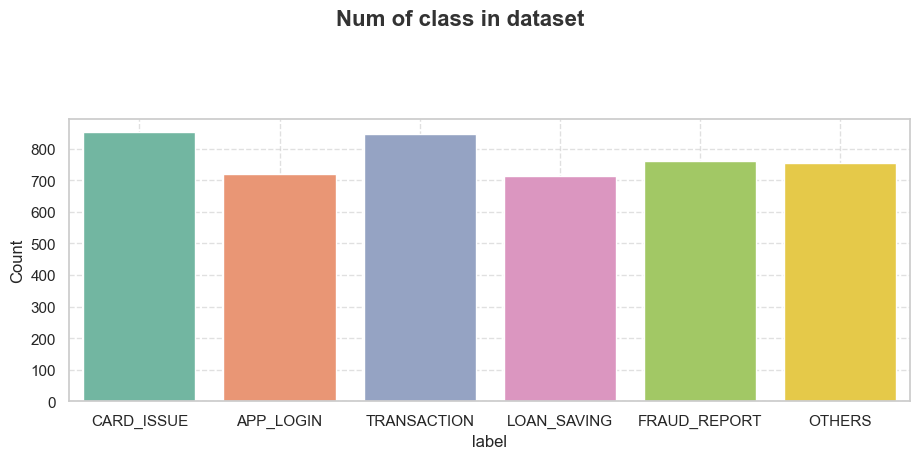

In [23]:
# bieu do so luong trong cac class cua dataset
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    x=llm_dataset['label'],
    data=llm_dataset,
    ax=ax,
    palette="Set2"
)

ax.set_ylabel('Count')
ax.grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Num of class in dataset',
             fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


In [24]:
llm_dataset['len'] = llm_dataset['text'].apply(len)

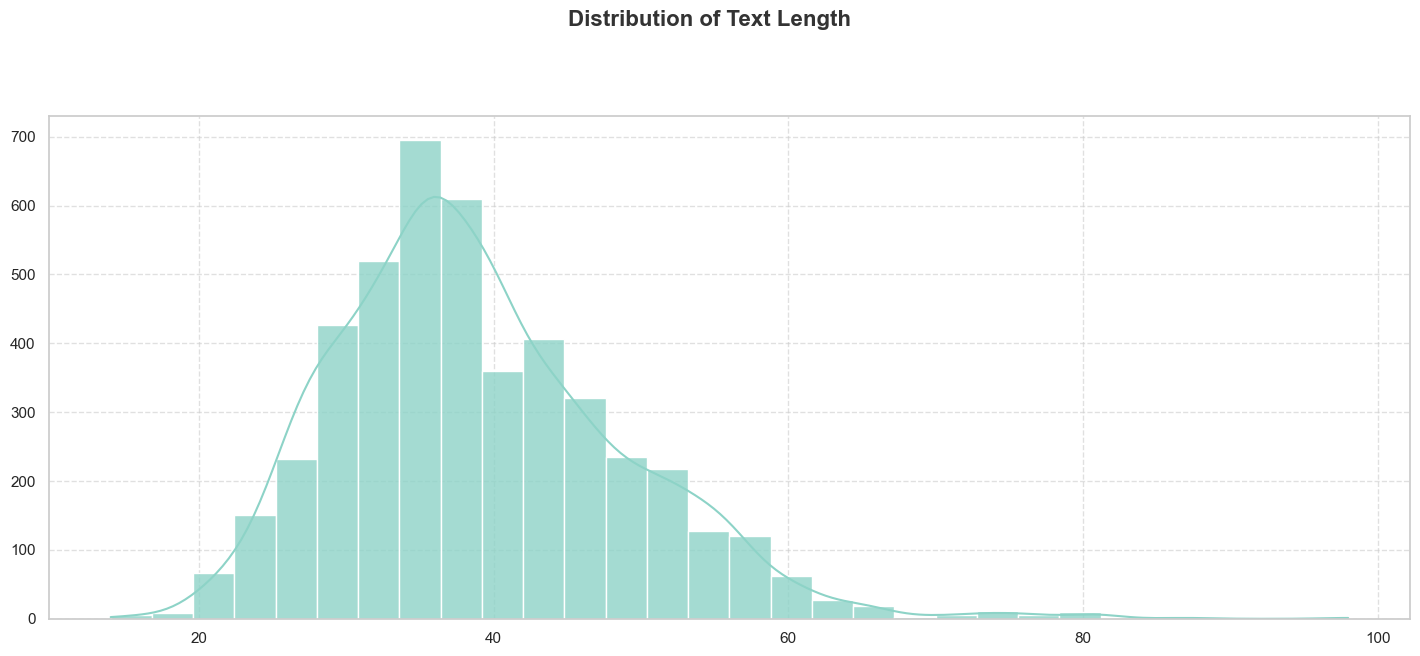

In [40]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots( figsize=(15, 7))

sns.histplot(
        x=llm_dataset['len'],
        color=sns.color_palette("Set3")[0],
        bins=30,
        kde=True,
        alpha=0.8
    )
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True, linestyle="--", alpha=0.6)

plt.suptitle('Distribution of Text Length', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(pad=3.0)
plt.show()


In [41]:
llm_dataset.describe()

,len
count,4648.000000
mean,38.964071
std,9.777039
min,14.000000
25%,32.000000
50%,38.000000
75%,45.000000
max,98.000000


In [42]:
label_map = {
    "CARD_ISSUE": 0, "APP_LOGIN": 1, "TRANSACTION": 2,
    "LOAN_SAVING": 3, "FRAUD_REPORT": 4, "OTHERS": 5
}
llm_dataset['label_id'] = llm_dataset['label'].map(label_map)
llm_dataset.head()


,text,label,len,label_id
0,"Thẻ chưa về cơ à, gửi hàng 느 lắm huhu",CARD_ISSUE,37,0
1,"Đổi thẻ mới bị lỗi, ngỏm quá không vào dc",CARD_ISSUE,41,0
2,"Thẻ cứng chưa nhận đc, bực quá ad ơi",CARD_ISSUE,36,0
3,"Thẻ bị hư, gửi lại vs nhanh lên nhé",CARD_ISSUE,35,0
4,"Cái thẻ nó toang rồi, k dc quẹt, alo hỗ trợ",CARD_ISSUE,43,0


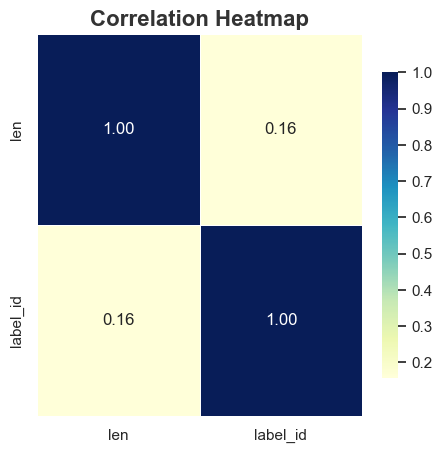

In [45]:
df_numeric = llm_dataset.select_dtypes(include=['int64', 'float64'])

corr = df_numeric.corr()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,5))
sns.heatmap(
    corr,
    annot=True,              
    fmt=".2f",
    cmap="YlGnBu",        
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='#333')

plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
Counter(" ".join(llm_dataset.text).split()).most_common(20)

[('bị', 1586),
 ('ko', 1255),
 ('dc', 1001),
 ('cần', 814),
 ('Thẻ', 539),
 ('tiền', 515),
 ('bi', 506),
 ('tk', 443),
 ('trợ', 414),
 ('hỗ', 413),
 ('ad', 409),
 ('atm', 409),
 ('sao', 408),
 ('lỗi,', 393),
 ('card', 392),
 ('Tk', 355),
 ('dc,', 336),
 ('làm', 323),
 ('qua', 322),
 ('k', 313)]